# Android Cihazları VS Ios Cihazları


##  KÜTÜPHANELERİ ÇAĞIRMAK

In [148]:
import pandas as pd 
import numpy as np
import matplotlib as plt
import seaborn as sns
from matplotlib import pyplot as plt

##  VERİ SETİNİ ÇAĞIRMAK VE KOLON İSİMLERİNİN DÜZENLEMESİ

In [149]:
data = pd.read_excel("dataSet.xls")
data = data.rename(columns = { "Device": "Cihaz", 
                              "CPU" : "Islemci",
                              "GPU" : "Ekran_Karti",
                              "MEM" : "Ram",
                              "UX" : "Kullanici_Deneyimi",
                              "Total Score" : "Toplam_Skor",
                              "OS" : "İşletim_Sistemi"
                              
                             })



data

,Cihaz,Islemci,Ekran_Karti,Ram,Kullanici_Deneyimi,Toplam_Skor,İşletim_Sistemi
0,iPad Pro 5 (12.9-inch) (8+256),351192,741383,183160,153993,1429728,Ios
1,iPad Pro 5 (11-inch) (8+128),351212,722399,137145,149463,1360219,Ios
2,iPad Air 5 (8+64),345275,635015,107955,140140,1228385,Ios
3,Red Magic 7 (S-8 Gen 1 18/256),235998,445681,175442,181650,1038771,Android
4,Redmi K50 Pro (M-9000 8/128),244999,390026,169449,182367,986840,Android
...,...,...,...,...,...,...,...
174,Infinix Hot 11S (M-G88 6/128),67728,61200,44181,82926,256035,Android
175,Redmi 10 (M-G88 6/128),62902,58096,41767,80297,243061,Android
176,Galaxy A51 (E-9611 6/128),55203,62849,45941,67989,231982,Android
177,Galaxy M31 (E-9611 6/128),55772,61407,46470,67868,231515,Android


##  DEĞİŞKEN TİPLERİNE BAKIP VERİYİ ANLAMA

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cihaz               179 non-null    object
 1   Islemci             179 non-null    int64 
 2   Ekran_Karti         179 non-null    int64 
 3   Ram                 179 non-null    int64 
 4   Kullanici_Deneyimi  179 non-null    int64 
 5   Toplam_Skor         179 non-null    int64 
 6   İşletim_Sistemi     179 non-null    object
dtypes: int64(5), object(2)
memory usage: 9.9+ KB


# 

## VERİ SETİNİN İSTATİSTİKSEL GÖZLEMİ 

In [151]:
data.describe()

,Islemci,Ekran_Karti,Ram,Kullanici_Deneyimi,Toplam_Skor
count,179.000000,179.000000,179.000000,179.000000,1.790000e+02
mean,164315.430168,226573.279330,98529.592179,119318.597765,6.087365e+05
std,55469.900787,123333.451434,34251.401138,27252.848090,2.267753e+05
min,55203.000000,49783.000000,39208.000000,52768.000000,2.250970e+05
25%,118644.500000,132581.000000,68063.000000,98424.500000,4.195495e+05
50%,160554.000000,219809.000000,97571.000000,118275.000000,6.086710e+05
75%,196729.500000,299041.500000,120661.000000,140160.000000,7.627725e+05
max,351212.000000,741383.000000,183160.000000,182367.000000,1.429728e+06


## VERİ SETİNDE EKSİK VERİ KONTROLÜ

In [152]:
data.isnull().sum().sum(),
data.isnull().sum()

Cihaz                 0
Islemci               0
Ekran_Karti           0
Ram                   0
Kullanici_Deneyimi    0
Toplam_Skor           0
İşletim_Sistemi       0
dtype: int64

## VERİ SETİNDE KORELASYON KATSAYILARINA BAKILARAK DEĞİŞKENLER ARASINDAKİ ANLAMLIĞIN ÖLÇÜLMESİ 

In [153]:
data.corr()

,Islemci,Ekran_Karti,Ram,Kullanici_Deneyimi,Toplam_Skor
Islemci,1.000000,0.916648,0.788749,0.761240,0.953742
Ekran_Karti,0.916648,1.000000,0.807061,0.732169,0.977957
Ram,0.788749,0.807061,1.000000,0.879410,0.888577
Kullanici_Deneyimi,0.761240,0.732169,0.879410,1.000000,0.837396
Toplam_Skor,0.953742,0.977957,0.888577,0.837396,1.000000


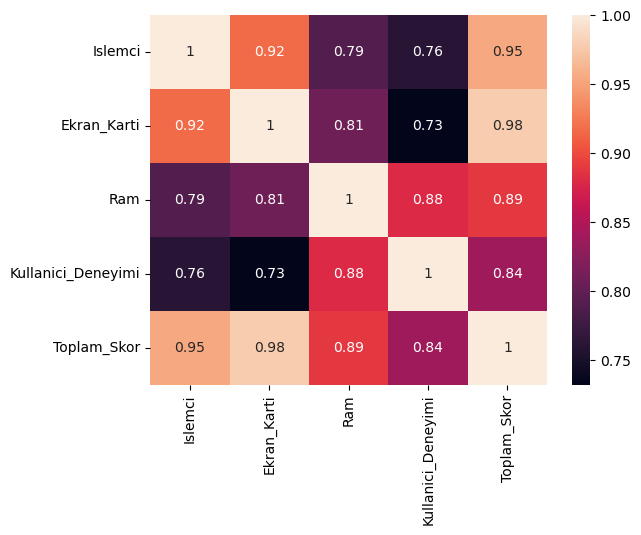

In [154]:
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

## TOPLAM SKOR (BAĞIMLI DEĞİŞKEN) KUTU GRAFİĞİ

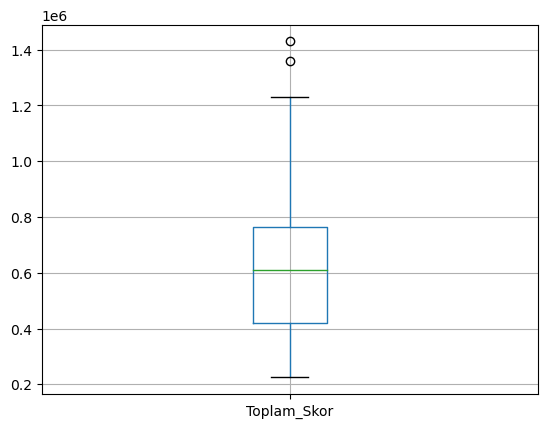

In [155]:
box1=data.boxplot(column=["Toplam_Skor"])

## TOPLAM SKOR (BAĞIMLI DEĞİŞKEN) HİSTOGRAM GRAFİĞİ

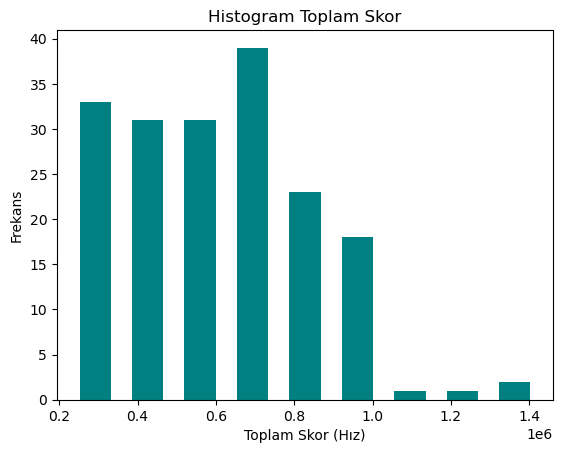

In [156]:
plt.hist(data.Toplam_Skor,bins= 9, color='#008080', rwidth=0.6,) 
plt.xlabel("Toplam Skor (Hız)")
plt.ylabel("Frekans")
plt.title("Histogram Toplam Skor")
plt.show()

## EN YÜKSEK TOPLAM SKORA SAHİP İLK 10 CİHAZ

Text(0.5, 1.0, 'EN YÜKSEK TOPLAM SKORA SAHİP İLK 10 CİHAZ')

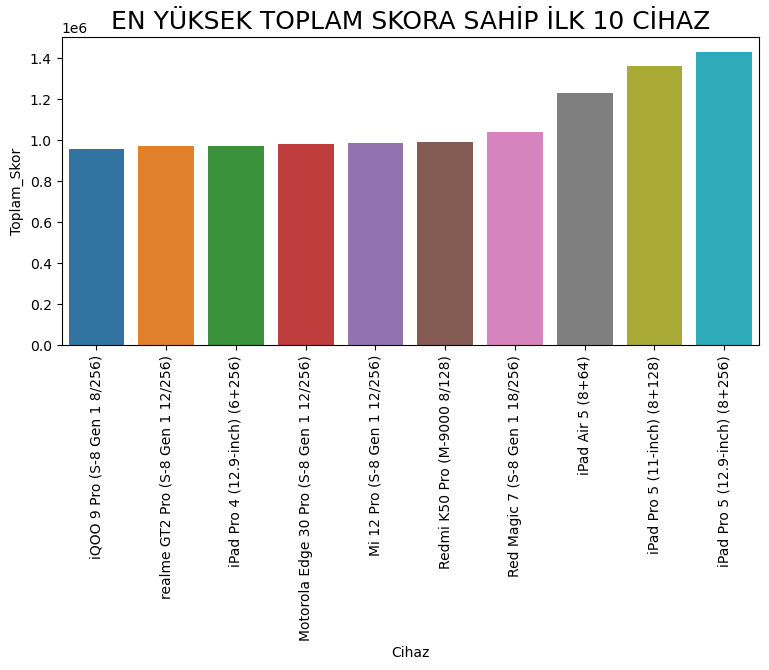

In [157]:
best_seller_high_price=data.groupby(data["Cihaz"])["Toplam_Skor"].max().sort_values()[-10:].reset_index()
plt.figure(figsize=(9,4))
ax=sns.barplot(x=best_seller_high_price["Cihaz"],y=best_seller_high_price["Toplam_Skor"])
plt.xticks(rotation=90)
plt.title("EN YÜKSEK TOPLAM SKORA SAHİP İLK 10 CİHAZ",fontsize=18)

## İŞLETİM SİSTEMLERİNİN TOPLAM SKOR BAR GRAFİĞİ

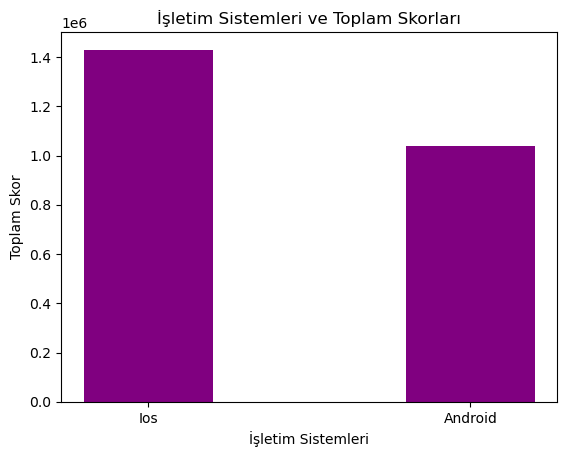

In [158]:
plt.bar(data.İşletim_Sistemi,data.Toplam_Skor,width = 0.4, color = "purple", )

plt.title("İşletim Sistemleri ve Toplam Skorları")
plt.xlabel("İşletim Sistemleri")
plt.ylabel("Toplam Skor")
plt.show()

## İŞLETİM SİSTEMLERİNİN İŞLEMCİ PUANI BAR GRAFİĞİ 

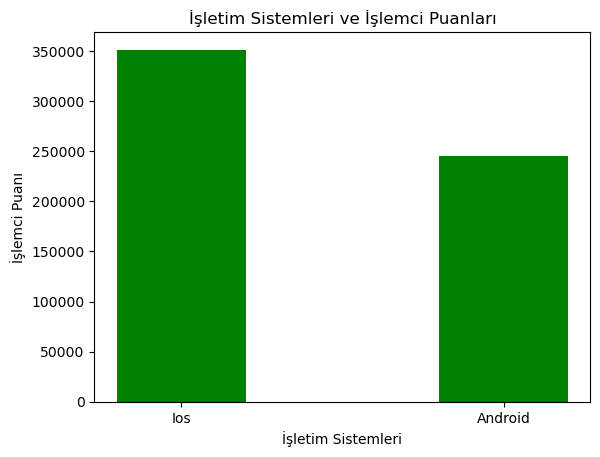

In [159]:
plt.bar(data.İşletim_Sistemi,data.Islemci,width = 0.4, color = "green", )

plt.title("İşletim Sistemleri ve İşlemci Puanları")
plt.xlabel("İşletim Sistemleri")
plt.ylabel("İşlemci Puanı")
plt.show()

## İŞLETİM SİSTEMLERİNİN EKRAN KARTI PUANI BAR GRAFİĞİ 

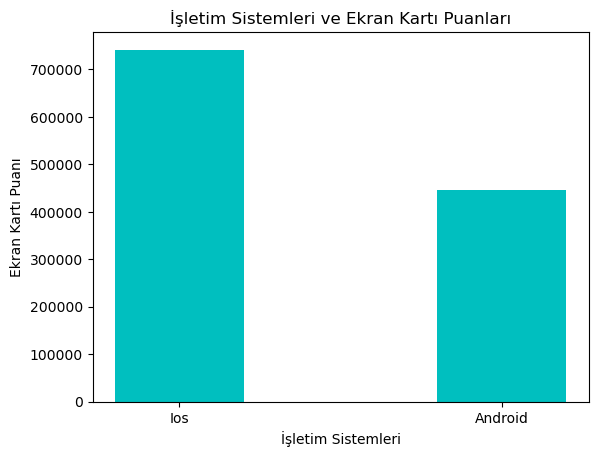

In [160]:
plt.bar(data.İşletim_Sistemi,data.Ekran_Karti,width = 0.4, color = "c", )

plt.title("İşletim Sistemleri ve Ekran Kartı Puanları")
plt.xlabel("İşletim Sistemleri")
plt.ylabel("Ekran Kartı Puanı")
plt.show()

## TOPLAM SKOR VE İŞLEMCİ PUANI ÇİZGİ GRAFİĞİ

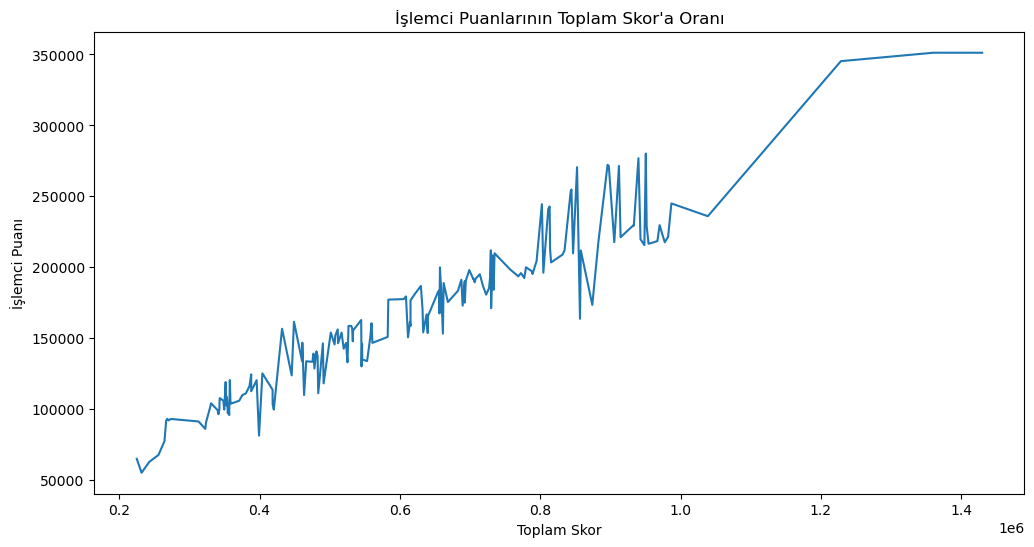

In [161]:

plt.figure(figsize=(12,6))
plt.title("İşlemci Puanlarının Toplam Skor'a Oranı")
plt.xlabel("Toplam Skor")
plt.ylabel("İşlemci Puanı")
plt.plot(data.Toplam_Skor,data.Islemci)
plt.color = '#008080'

plt.show()

## EKRAN KARTI PUANI VE TOPLAM SKOR NOKTA GRAFİĞİ

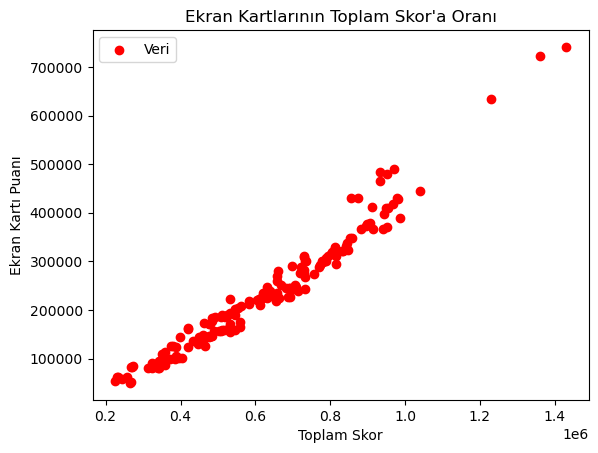

In [162]:

plt.scatter(data.Toplam_Skor, data.Ekran_Karti,color="red",label="Veri")
plt.legend() 
plt.xlabel("Toplam Skor") 
plt.ylabel("Ekran Kartı Puanı")
plt.title("Ekran Kartlarının Toplam Skor'a Oranı") 
plt.show()

## DEĞİŞKENLERİN FARKLI GRAFİKLER ÜZERİNDEN ANLAMLILIĞININ KONTROLÜ

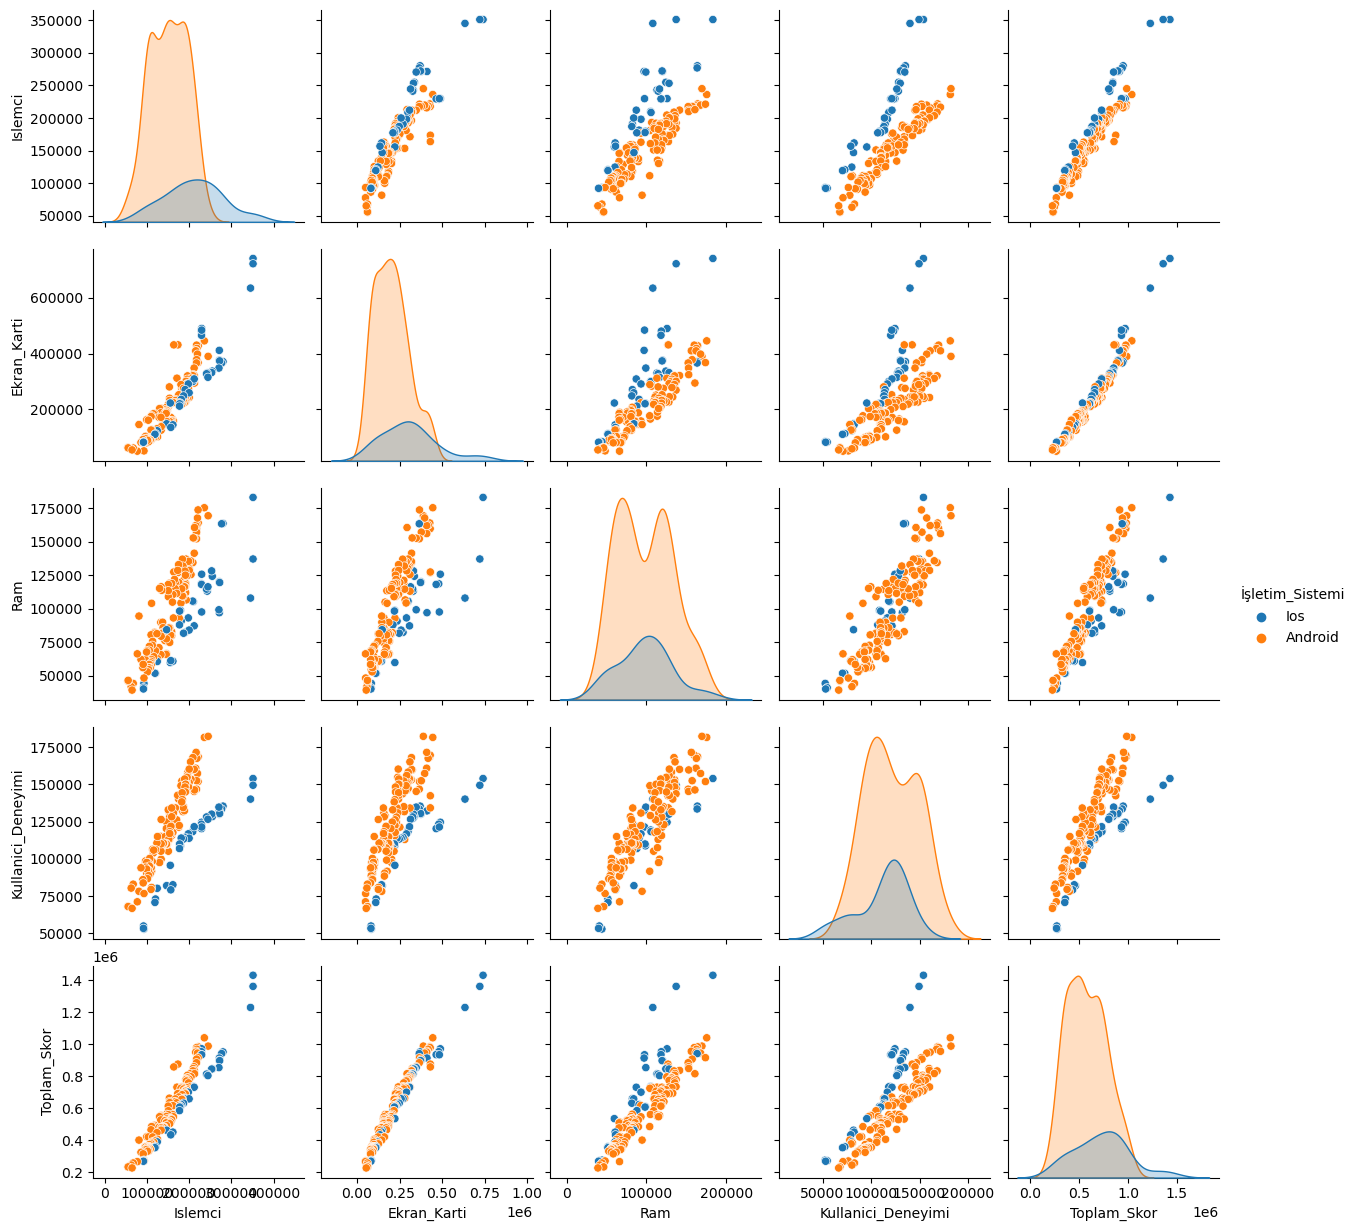

In [163]:
dat2 = data.copy()
dat2 = dat2.drop(["Cihaz"], axis = 1)
sns.pairplot(dat2, hue = "İşletim_Sistemi")
plt.show()